In [1]:
from langgraph.graph import StateGraph,START,END

In [2]:
from typing import TypedDict


In [3]:
#Define State

class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi:float



In [4]:
# Define you function
def calculate_bmi(state:BMIState)->BMIState:

    weight_kg=state['weight_kg']
    height_m=state['height_m']

    bmi=weight_kg/(height_m**2)
    state['bmi']=round(bmi,2)
    return state


In [5]:
#define your Graph
graph=StateGraph(BMIState)

#add nodes to you graph
graph.add_node('calculate_bmi',calculate_bmi)

#add edges to your gaph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',END)

#compile the graph
workflows=graph.compile()
#execute graph

In [6]:
initial_state= {'weight_kg':80,'height_m':1.73}

final_state=workflows.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}


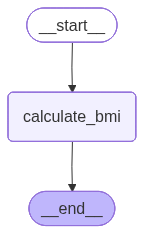

In [ ]:
from IPython.display import Image
Image(workflows.get_graph().draw_mermaid_png())

In [9]:
# %pip install dotenv